<a href="https://colab.research.google.com/github/rani1310/Projects/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np  ##for nuerical operations
import pandas as pd ##pandas for analysis and data processing
import matplotlib.pylab as plt ###for visulaization
import seaborn as sns ###for statistical visualization
%matplotlib inline
from matplotlib.pylab import rcParams ##dictionary like object that allows you to cusomize the fig , its size ect
rcParams['figure.figsize']=10,6

In [12]:
Data = ("/content/AirPassengers.csv")

In [13]:
Data =pd.read_csv(Data)

In [14]:
Data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [20]:
##Parse strings to date time type

###Pandas will read the month column in our dataframe named as data ,pandas function will convert date and time into
##proper. date and time format and infer fucntion tries its best to convert the date and time values in
###proper format in month column.
##indexed function will set the month column as index making it easier to access in row
Data['Month'] = pd.to_datetime(Data['Month'], infer_datetime_format=True)
IndexedData= Data.set_index(['Month'])

<ipython-input-20-eae5ca52dda3>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  Data['Month'] = pd.to_datetime(Data['Month'], infer_datetime_format=True)


In [21]:
from datetime import datetime
IndexedData.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


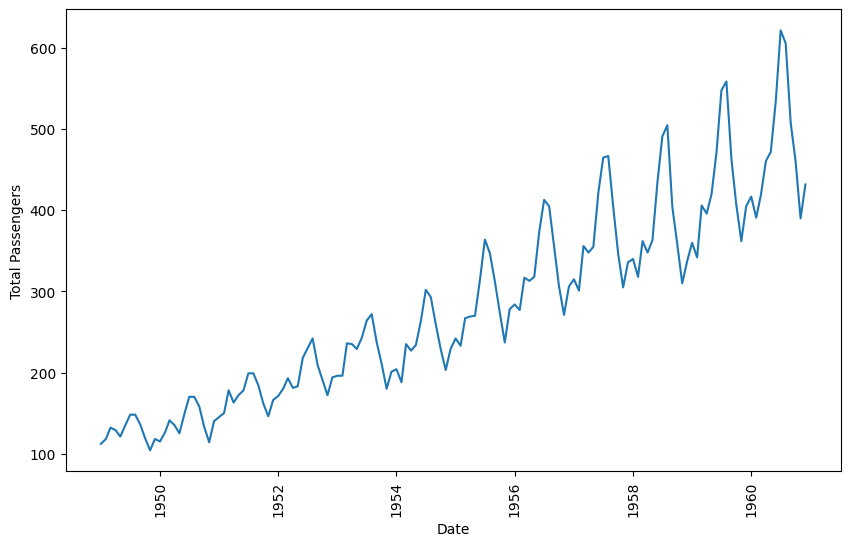

In [22]:
###since we have data in proper date - time format lets plot graph

plt. xticks(rotation='vertical')
plt.xlabel('Date')
plt.ylabel('Total Passengers')
plt.plot(IndexedData)

In [25]:
###Lets calculate rolling statistics using mean and SD

##therefore from the output we can see since we gave a window of 12 months so it gave overall mean at 12th month and rest 11 are NAN.
rollmean= IndexedData.rolling(window=12).mean()
rollstd= IndexedData.rolling(window=12).std()
print(rollmean, rollstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]             #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

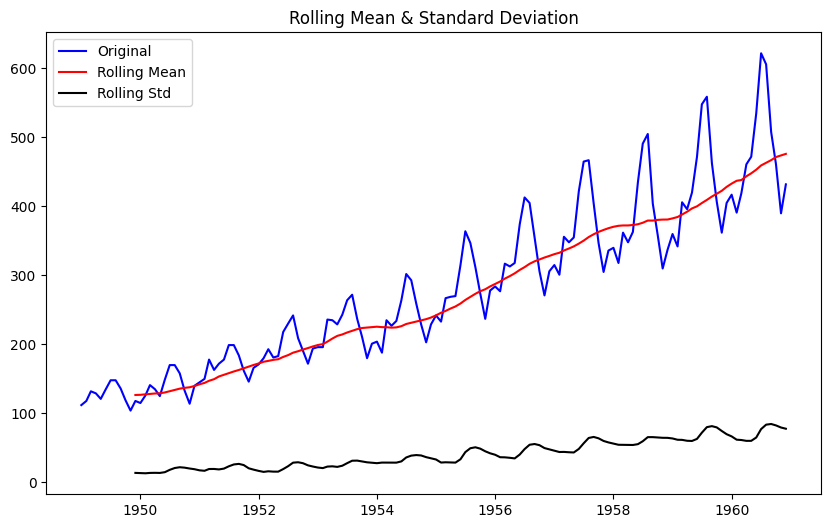

In [26]:
##Plot the rolling statistics
##original data is in blue, mean in red, sd in black but we can see that data is not stationary
orig= plt.plot(IndexedData, color='blue', label='Original')
mean= plt.plot(rollmean, color='red', label='Rolling Mean')
std= plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')


In [30]:
##To generate efficienty we wil use Dickey fuller test to see if the stats is ststionary
#adfuller(augumented dicky fuller)to test if stats is statinary
##AIC(Akaike Info Criteria)helps analyze what we want from time series and measures a difference
##between the actual and expected value
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller test:')
dftest= adfuller(IndexedData['#Passengers'], autolag='AIC')
dfoutput= pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
  dfoutput['Critical Value (%s)'%key]= value

  print(dfoutput)



Results of Dickey-Fuller test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
dtype: float64
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
dtype: float64
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


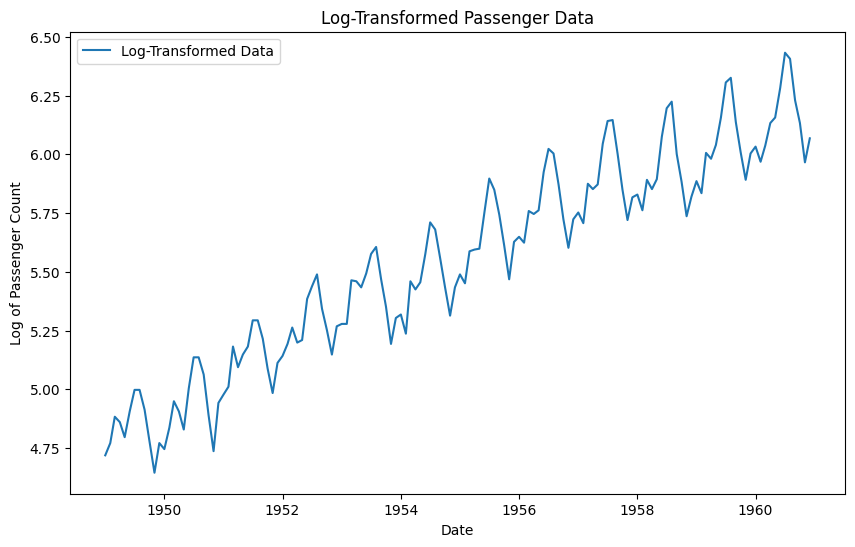

In [32]:
##as per the result we can see that p value> test stats which shows as non stationary
##So, we will be using estimating trend function using log to analyze the growth pattern with time

IndexedData_LogScale = np.log(IndexedData)
plt.plot(IndexedData_LogScale['#Passengers'], label='Log-Transformed Data') # Pass the column as a series
plt.xlabel('Date')
plt.ylabel('Log of Passenger Count')
plt.title('Log-Transformed Passenger Data')
plt.legend()
plt.show()

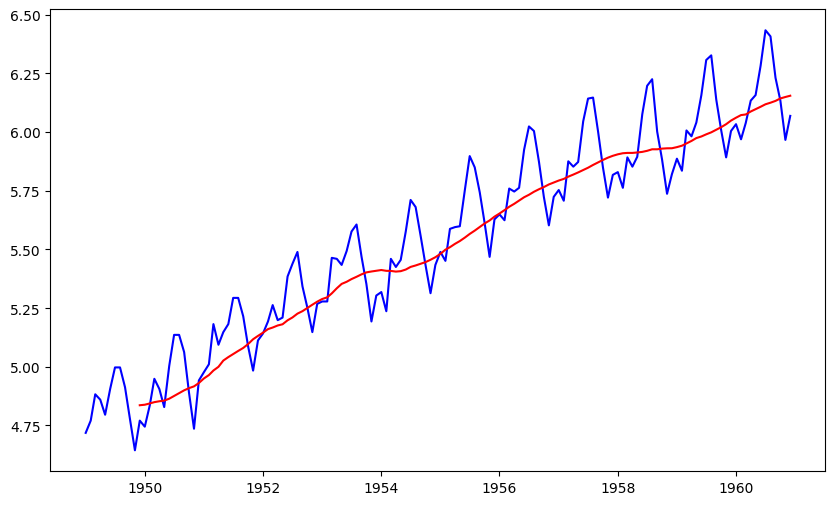

In [33]:
##from the curve we cana analyze that just the y axis has cahnged but no shift in trend line.
##so, as next step we will try to see the moving average with log for the mean and sd

movin_average= IndexedData_LogScale.rolling(window=12).mean()
moving_std= IndexedData_LogScale.rolling(window=12).std()
plot_moving_average= plt.plot(IndexedData_LogScale, color='blue', label='Original')
plot_moving_average= plt.plot(movin_average, color='red', label='Rolling Mean')

We are subtracting movin_average from IndexedData_LogScale.

IndexedData_LogScale is probably some time series data that has been transformed using a log scale.

movin_average is likely the moving average of that same data (or a related series).

Result: We get a new series datalogScaleMinusMovingAverage which shows how much the log-scaled data deviates from its moving average at each point.

In [34]:
##Now we will take the difference between the actual average and the moving average to see if the time series is stationary
#
datalogScaleMinusMovingAverage= IndexedData_LogScale-movin_average
datalogScaleMinusMovingAverage.head(12)

##Remove Nan values
datalogScaleMinusMovingAverage.dropna(inplace=True)
datalogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


This displays the first 12 rows of the result.

It's just for inspection — we want to quickly look at the first 12 values to check if the subtraction worked.

Then This removes any rows that have NaN (missing values) in the result.

inplace=True means it will modify the existing DataFrame/Series directly, without needing to reassign it.

We probably have NaN values because moving averages (especially with window sizes) often create NaN values at the start where there isn't enough past data.



In [36]:
##Now to build our model and test if our time sries is stationary we will be plotting our
##rolling stats

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  #Determing rolling statistics
  movin_average= timeseries.rolling(window=12).mean()
  moving_std =timeseries.rolling(window=12).std()

  ##plot the rolling statistics
  orig= plt.plot(timeseries, color='blue', label='Original')
  mean= plt.plot(movin_average, color='red', label='Rolling Mean')
  std= plt.plot(moving_std, color='black', label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean & Standard Deviation')
  plt.show(block=False)

  ##Perform the Dickey fuller test
  print('Results of Dickey-Fuller test:')
  dftest= adfuller(timeseries['#Passengers'], autolag='AIC')
  dfoutput= pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
  for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key]= value
  print(dfoutput)

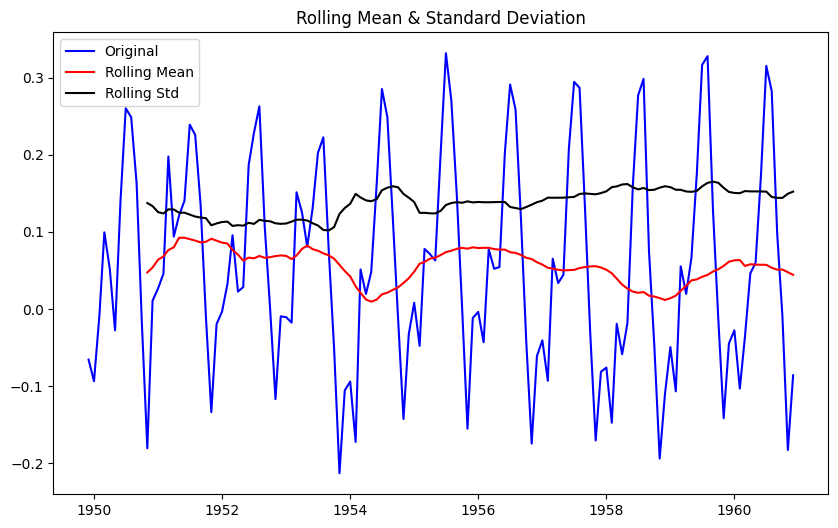

Results of Dickey-Fuller test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64


In [37]:
test_stationarity(datalogScaleMinusMovingAverage)

Therefore we can see that there isnt much variation and our p value is also < test statsiscs that shows it to be stationary

After cleaning, we display the first 10 rows again to verify that the NaNs are gone and the data looks good.

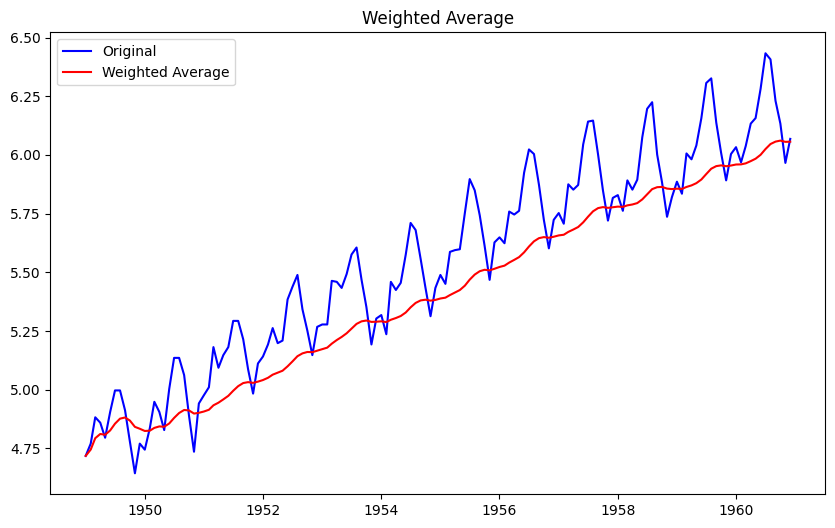

In [38]:
##Now we will calculate the weighted average

weighted_average= IndexedData_LogScale.ewm(halflife=12).mean()
plt.plot(IndexedData_LogScale, color='blue', label='Original')
plt.plot(weighted_average, color='red', label='Weighted Average')
plt.legend(loc='best')
plt.title('Weighted Average')
plt.show()

Therefore we can see as time is progressing log is progressing


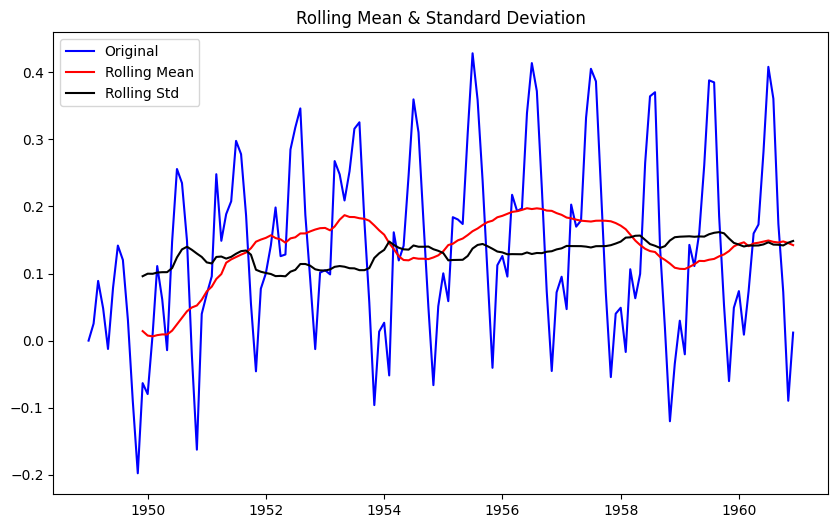

Results of Dickey-Fuller test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [39]:
datalogScaleMinusMovingExponentialDecayAverage= IndexedData_LogScale-weighted_average
datalogScaleMinusMovingExponentialDecayAverage
test_stationarity(datalogScaleMinusMovingExponentialDecayAverage)

We are subtracting a weighted moving average (probably an exponentially weighted moving average) from your log-scaled data (IndexedData_LogScale).

weighted_average likely gives more weight to recent data points (compared to a simple moving average which treats all points equally).

Result:

datalogScaleMinusMovingExponentialDecayAverage captures short-term fluctuations without long-term trends but in a way that reacts faster to recent changes compared to a simple moving average.

As the next staep:


We are calling a function named test_stationarity() on our differenced data.

Goal: To check if the resulting series is stationary (i.e., no trend, constant mean and variance over time).

Inside test_stationarity(), typically:

It might plot the rolling mean and standard deviation.

It might run a statistical test like the Augmented Dickey-Fuller (ADF) test.

It probably prints out the p-value — if p-value is low (e.g., < 0.05), the series is stationary.

As we can see that p value is again less than test statistics showing it as stationary


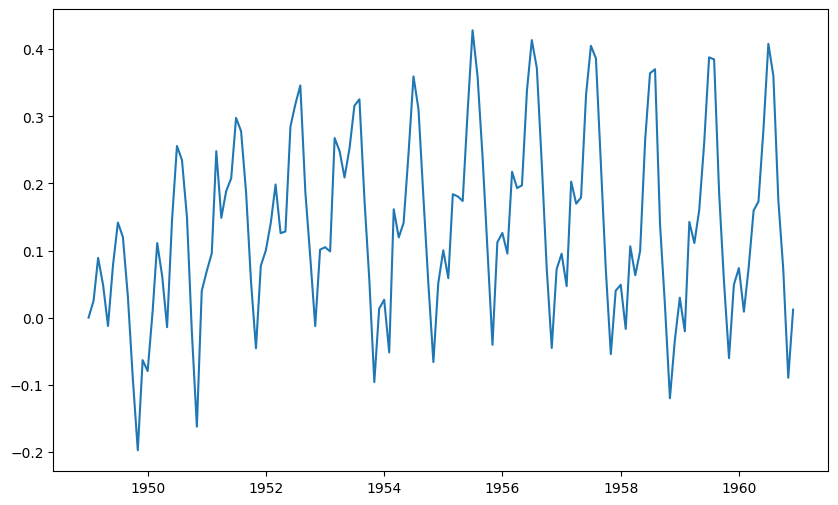

In [41]:
##Now since we have determine the calues we will now shift the values to time series

DatalogoOffShift= IndexedData_LogScale-weighted_average
##DatalogoOffShift.dropna(inplace=True)
##test_stationarity(DatalogoOffShift)
plt.plot(DatalogoOffShift)

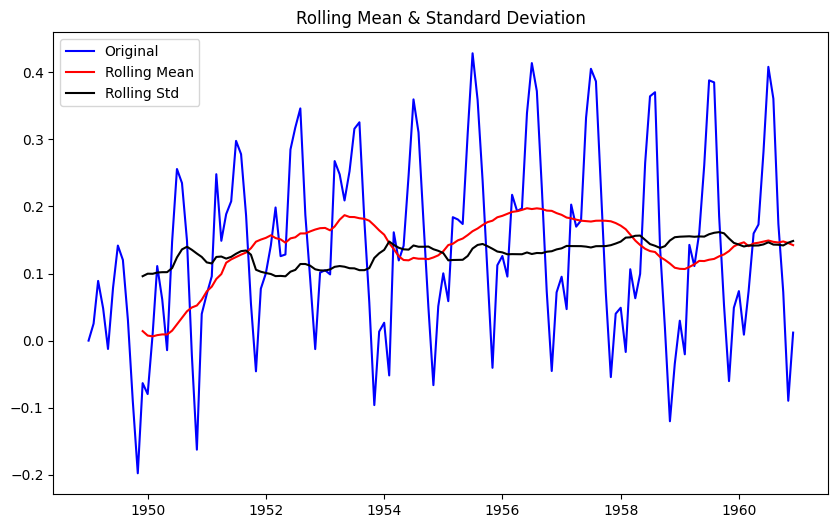

Results of Dickey-Fuller test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [42]:
##We will drop the na values
DatalogoOffShift.dropna(inplace=True)
test_stationarity(DatalogoOffShift)

Again we can see that the model is stationary by shifting with 1-1 points

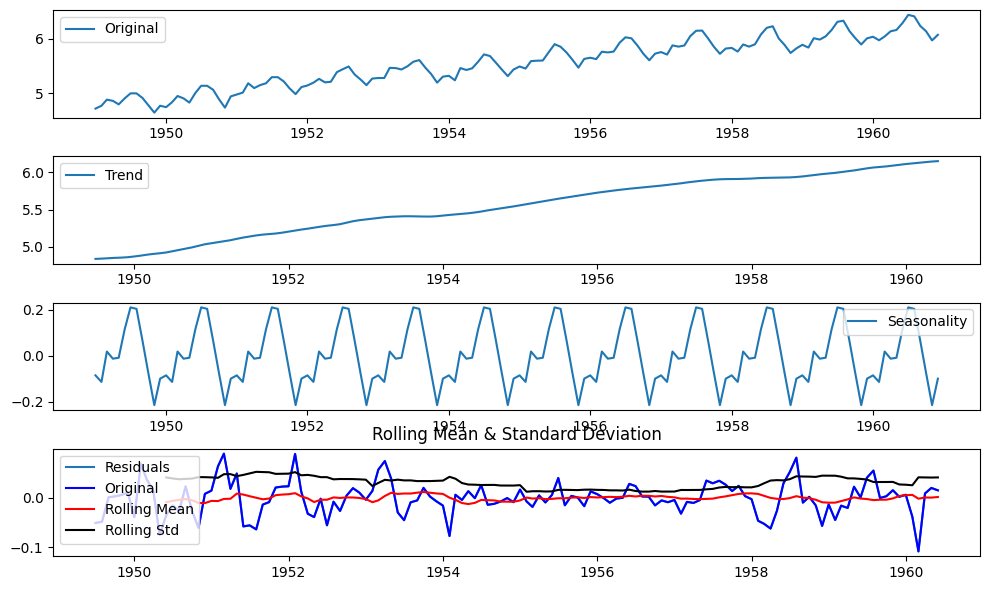

Results of Dickey-Fuller test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [49]:
##Now lets build a time series model with its components

##Now lets build a time series model with its components

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition= seasonal_decompose(IndexedData_LogScale)
trend= decomposition.trend
seasoanal= decomposition.seasonal
residual= decomposition.resid

plt.subplot(411)
plt.plot(IndexedData_LogScale, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasoanal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedlogdata = residual
decomposedlogdata.dropna(inplace=True)


test_stationarity(decomposedlogdata.to_frame(name='#Passengers'))

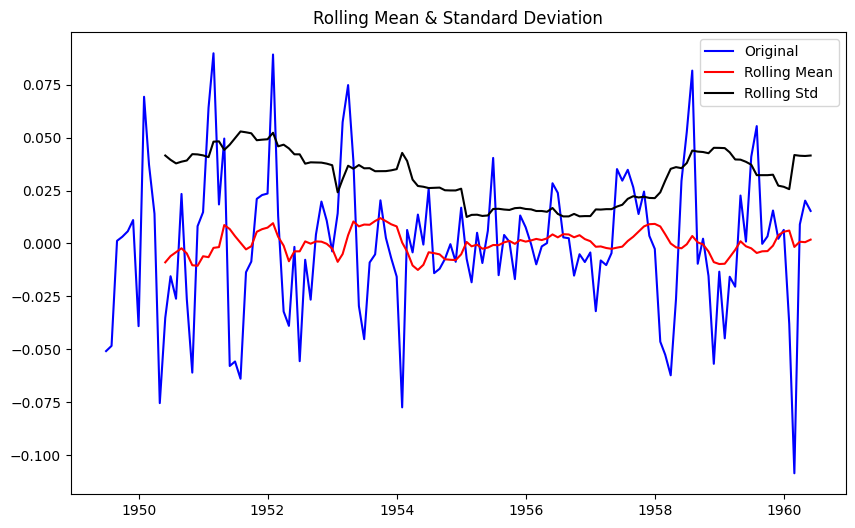

Results of Dickey-Fuller test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (1%)           -3.485122e+00
Critical Value (5%)           -2.885538e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [51]:
##As next step we will again check if its stationary based on rolling average

decomposelogdata = residual
decomposelogdata.dropna(inplace=True)
test_stationarity(decomposedlogdata.to_frame(name='#Passengers'))

As per the curve we can see that its not stationary thats y we need moving average

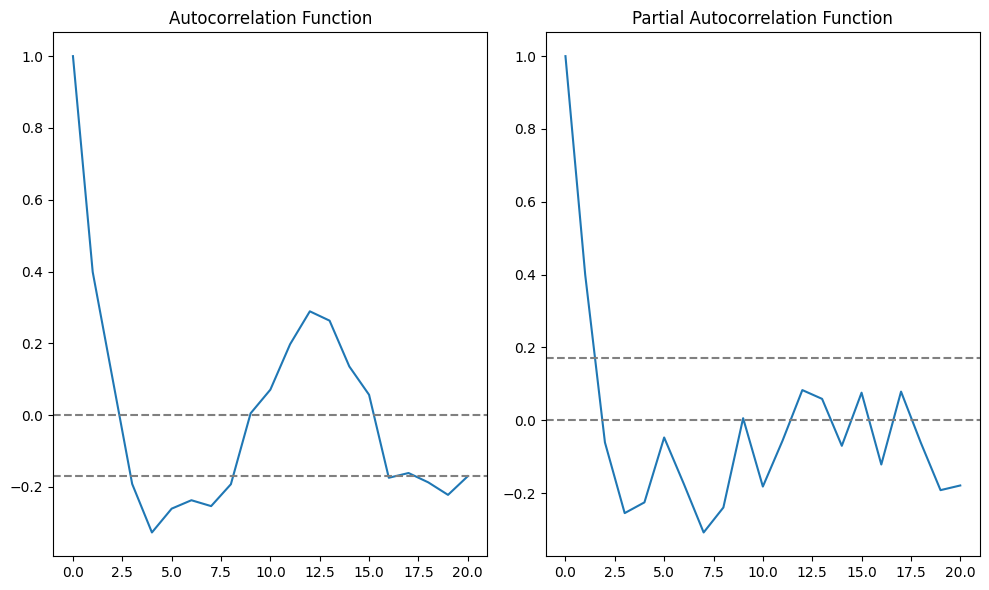

In [52]:
##Since we have all the values we will be building forecasting to identify stationary pattern using auto corrective function and partial auto corrective

from statsmodels.tsa.stattools import acf, pacf
lag_acf= acf(decomposedlogdata, nlags=20)
lag_pacf= pacf(decomposedlogdata, nlags=20, method='ols')##3ordianry least sq

##Plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(decomposedlogdata)), linestyle='--', color='gray')
plt.title("Autocorrelation Function")
##Plot PCF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(decomposedlogdata)), linestyle='--', color='gray')
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

As we determined the p value, q value and d value while determining where the value cuts to 0 for the first time. Therefore we can now build our ARIMA Model



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting AR Model


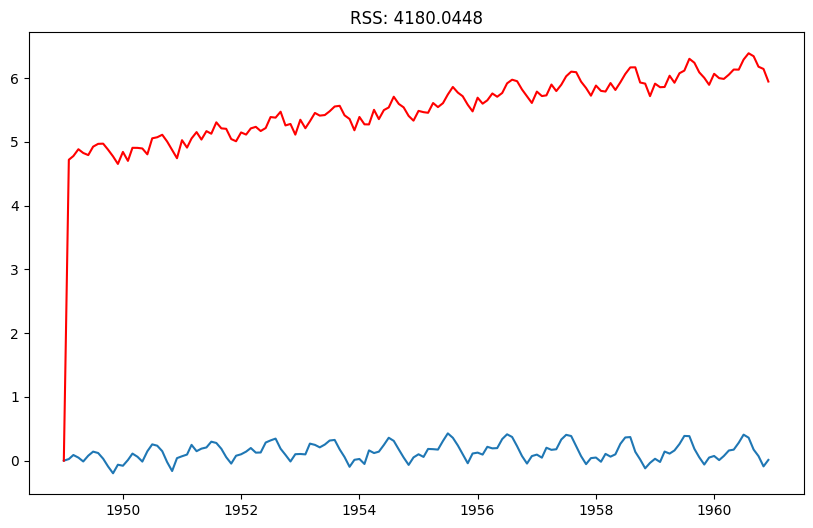

In [66]:
##Lets buidl the ARIMA Model

from statsmodels.tsa.arima.model import ARIMA # Import the correct ARIMA class
##results_AR=model.fit()
##plt.plot(DatalogoOffShift)
model= ARIMA(IndexedData_LogScale, order=(2,1,2))
results_AR= model.fit()
plt.plot(DatalogoOffShift)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-DatalogoOffShift['#Passengers'])**2))
print("Plotting AR Model")

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting MA Model


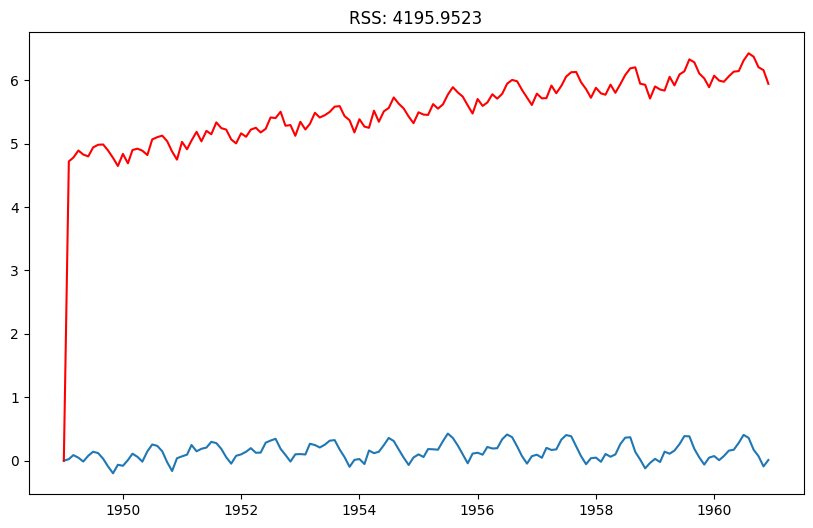

In [67]:
###Lets build Moving average model

model= ARIMA(IndexedData_LogScale, order=(0,1,2))
results_MA= model.fit()
plt.plot(DatalogoOffShift)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues-DatalogoOffShift['#Passengers'])**2))
print("Plotting MA Model")

RSS= sum of sq differences between models fitted and actual value. Less RSS = better model fit

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Plotting ARMA Model


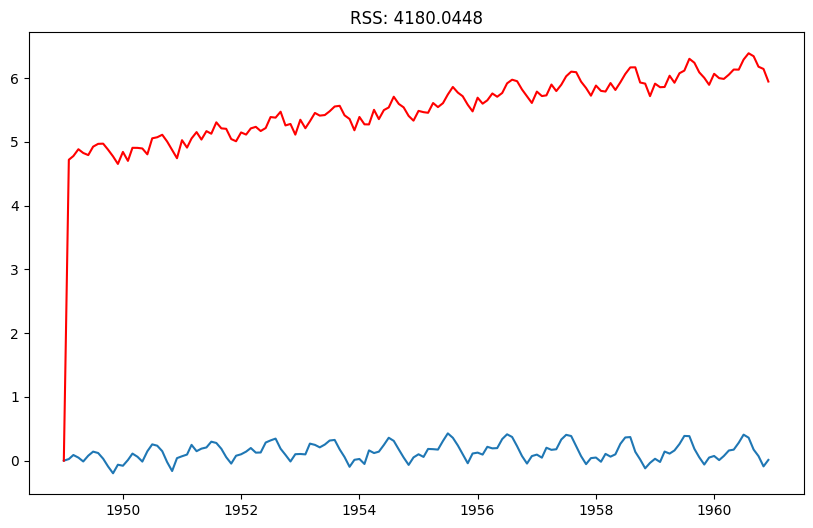

In [69]:
##Now lets build ARMA model

model= ARIMA(IndexedData_LogScale, order=(2,1,2))
results_ARIMA= model.fit()
plt.plot(DatalogoOffShift)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues-DatalogoOffShift['#Passengers'])**2))
print("Plotting ARMA Model")

In [70]:
##;Lets convert the fitted values into series format

predictions_ARIMA_diff= pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Month
1949-01-01    0.000000
1949-02-01    4.718499
1949-03-01    4.776385
1949-04-01    4.883216
1949-05-01    4.824421
dtype: float64


In [71]:
##Lets calculate the cumulative sum

predictions_ARIMA_diff_cumsum= predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Month
1949-01-01     0.000000
1949-02-01     4.718499
1949-03-01     9.494884
1949-04-01    14.378100
1949-05-01    19.202522
dtype: float64


In [72]:
##Build a prediction for the fitted values

predictions_ARIMA_log= pd.Series(IndexedData_LogScale['#Passengers'].iloc[0], index=IndexedData_LogScale.index)
predictions_ARIMA_log= predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

,0
Month,
1949-01-01,4.718499
1949-02-01,9.436998
1949-03-01,14.213383
1949-04-01,19.096599
1949-05-01,23.921020


In [81]:
##To check how many rows dataset has before predicting

IndexedData_LogScale.shape

(144, 1)

In [87]:
##What if I want to precit next 10 years then data poimts will 120 i.e 12*10


results_ARIMA.forecast(steps=120)
x= results_ARIMA.forecast(steps=12)
print(x)


1961-01-01    6.157565
1961-02-01    6.122239
1961-03-01    6.137509
1961-04-01    6.131767
1961-05-01    6.134458
1961-06-01    6.133575
1961-07-01    6.134081
1961-08-01    6.133967
1961-09-01    6.134075
1961-10-01    6.134071
1961-11-01    6.134099
1961-12-01    6.134104
Freq: MS, Name: predicted_mean, dtype: float64


In [90]:
##if we want to plot the preiction

##results_ARIMA.plot_predict(1,24)
x= results_ARIMA.forecast(steps=12)
print(x)

1961-01-01    6.157565
1961-02-01    6.122239
1961-03-01    6.137509
1961-04-01    6.131767
1961-05-01    6.134458
1961-06-01    6.133575
1961-07-01    6.134081
1961-08-01    6.133967
1961-09-01    6.134075
1961-10-01    6.134071
1961-11-01    6.134099
1961-12-01    6.134104
Freq: MS, Name: predicted_mean, dtype: float64
